#HW2 Problem 2

Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

##Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



##Generate Random Data

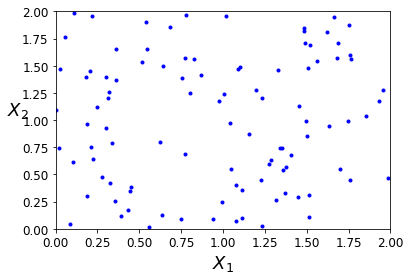

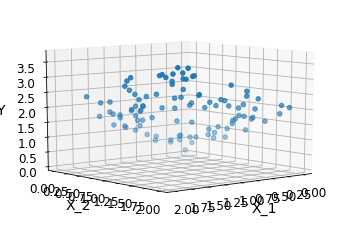

In [281]:
# generate m random pairs (x, y)

m = 100
X1 = 2 * np.random.rand(m, 1)
X2 = 2 * np.random.rand(m, 1)
Y = X1 + X2

plt.plot(X1, X2, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 2])
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
ax.scatter(X1, X2, Y)
ax.view_init(10, 50)

In [81]:
print(X1.shape)
print(X1[:5, :])

(100, 1)
[[1.52792639]
 [0.01015763]
 [1.83551729]
 [0.39489763]
 [1.96823777]]


In [82]:
print(X2.shape)
print(X2[:5, :])

(100, 1)
[[1.77521666]
 [0.73570139]
 [0.28564822]
 [1.39176315]
 [0.32915629]]


In [282]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X1, X2])
print(X_b.shape)

# show the first 5 rows
print(X_b[:5, :])

# create array with x1=1 and x2=2, x3=10
X_new = np.array([[1], [2], [10]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((3, 1)), X_new])

print(X_new_b)

(100, 3)
[[1.         1.04153628 0.97319532]
 [1.         1.23299945 1.19873793]
 [1.         0.31327687 1.20429129]
 [1.         0.08747125 0.04586562]
 [1.         0.22161592 0.64421601]]
[[ 1.  1.]
 [ 1.  2.]
 [ 1. 10.]]


##Linear Regression with Mini-Batch Gradient Descent

In [333]:
# number of epochs
epochs = 20
# learning rate
lr = 0.0001
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_mgd[-1]
weight_path_mgd = np.array(weight_path_mgd)

##Plot

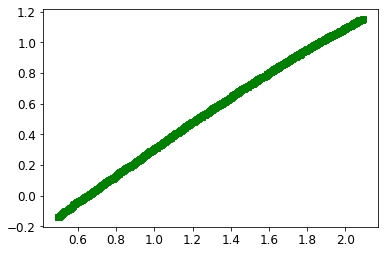

In [189]:
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")

##3D Plot

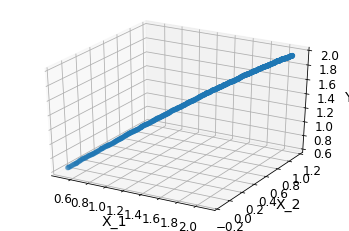

In [190]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')

ax.scatter(weight_path_mgd[:,0], weight_path_mgd[:,1], weight_path_mgd[:,2])


##Prediction

In [340]:
m = 100

TestX1 = 2 * np.random.rand(m, 1)
TestX2 = 2 * np.random.rand(m, 1)
TestY = X1 + X2 

TestX = np.column_stack([np.ones((m,1)),TestX1, TestX2])

print(X_new_b.shape)
print(X_new_b)

(3, 2)
[[ 1.  1.]
 [ 1.  2.]
 [ 1. 10.]]


##Prediction Plot

Black: Actual
Red: Prediction


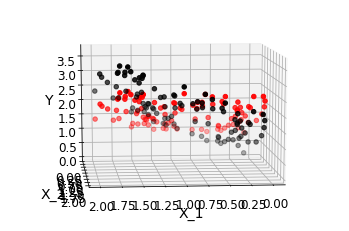

In [341]:
PredictY = TestX.dot(weight);

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
print("Black: Actual")
print("Red: Prediction")
ax.scatter(TestX1, TestX2, TestY, c='black')
ax.scatter(TestX1, TestX2, PredictY, c='red')


ax.view_init(10, 85)